In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Load dataset
data = pd.read_csv('building_data_full_year_copy.csv')
#data = pd.read_csv('2948_building_data.csv')

In [4]:
data.head()

,timestamp,/Heating/DH/TE1_Supply,/Heating/DH/TE2_Return,/Heating/DHW/P1_State,/Heating/DHW/Settings/TE1_Supply_SetPoint,/Heating/DHW/TE1_Supply,/Heating/DHW/TE2_Return,/Heating/DHW/TV1_State,/Heating/DH_Cutter_DHW_01/Cutter_On,/Heating/DH_Cutter_DHW_01/Max_time_reached,...,"('Temperature_01', 1778)","('Temperature_01', 1783)","('Temperature_01', 1784)","('Temperature_01', 1785)","('Temperature_01', 1786)","('Temperature_01', 1787)","('Temperature_01', 1788)","('Temperature_01', 1790)","('Temperature_01', 1791)","('Temperature_01', 1792)"
0,2021-08-27 06:00:00+00:00,39.846759,36.500000,1,58,58.319519,56.546322,14.854906,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-08-27 07:00:00+00:00,40.360371,37.730283,1,58,58.131677,56.320858,16.668270,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-08-27 08:00:00+00:00,69.707457,34.269484,1,58,58.296594,56.269148,27.433136,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-08-27 09:00:00+00:00,69.284162,34.197934,1,58,57.844162,56.038306,15.858749,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-08-27 10:00:00+00:00,68.271607,44.017429,1,58,58.112526,56.487521,10.268326,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Convert the data type of timestamp column to date time format
data['date'] = pd.to_datetime(data['timestamp'])
#del data['timestamp']

In [6]:
# Select only the temperature data and make it index
df_full = data.iloc[:,134:] # 3452
#df_full = data.iloc[:,304:] # 2948
df_full = df_full.set_index('date')

In [7]:
df_full.head()

,"('Temperature_01', 1777)","('Temperature_01', 1778)","('Temperature_01', 1783)","('Temperature_01', 1784)","('Temperature_01', 1785)","('Temperature_01', 1786)","('Temperature_01', 1787)","('Temperature_01', 1788)","('Temperature_01', 1790)","('Temperature_01', 1791)","('Temperature_01', 1792)"
date,,,,,,,,,,,
2021-08-27 06:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-08-27 07:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-08-27 08:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-08-27 09:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-08-27 10:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Remove the zero value and missing value
df_full = df_full[df_full != 0]
df_full = df_full.dropna()

In [9]:
# Check the data portion
df_full.head()

,"('Temperature_01', 1777)","('Temperature_01', 1778)","('Temperature_01', 1783)","('Temperature_01', 1784)","('Temperature_01', 1785)","('Temperature_01', 1786)","('Temperature_01', 1787)","('Temperature_01', 1788)","('Temperature_01', 1790)","('Temperature_01', 1791)","('Temperature_01', 1792)"
date,,,,,,,,,,,
2021-10-11 13:00:00+00:00,20.0,23.0,21.1,22.4,22.2,19.4,22.3,20.7,23.1,21.1,17.9
2021-10-11 14:00:00+00:00,19.9,23.0,21.1,22.3,22.2,21.2,22.4,20.7,23.1,21.1,19.6
2021-10-11 15:00:00+00:00,20.0,23.0,21.1,22.4,22.3,21.1,22.5,20.8,22.9,21.1,19.6
2021-10-11 16:00:00+00:00,21.6,23.0,21.2,22.4,22.5,21.3,22.8,21.3,23.3,21.4,19.7
2021-10-11 17:00:00+00:00,22.2,23.1,21.3,22.8,22.7,21.5,23.1,21.6,23.7,21.7,19.9


In [10]:
# Check the data form
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6474 entries, 2021-10-11 13:00:00+00:00 to 2022-08-05 12:00:00+00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ('Temperature_01', 1777)  6474 non-null   float64
 1   ('Temperature_01', 1778)  6474 non-null   float64
 2   ('Temperature_01', 1783)  6474 non-null   float64
 3   ('Temperature_01', 1784)  6474 non-null   float64
 4   ('Temperature_01', 1785)  6474 non-null   float64
 5   ('Temperature_01', 1786)  6474 non-null   float64
 6   ('Temperature_01', 1787)  6474 non-null   float64
 7   ('Temperature_01', 1788)  6474 non-null   float64
 8   ('Temperature_01', 1790)  6474 non-null   float64
 9   ('Temperature_01', 1791)  6474 non-null   float64
 10  ('Temperature_01', 1792)  6474 non-null   float64
dtypes: float64(11)
memory usage: 606.9 KB


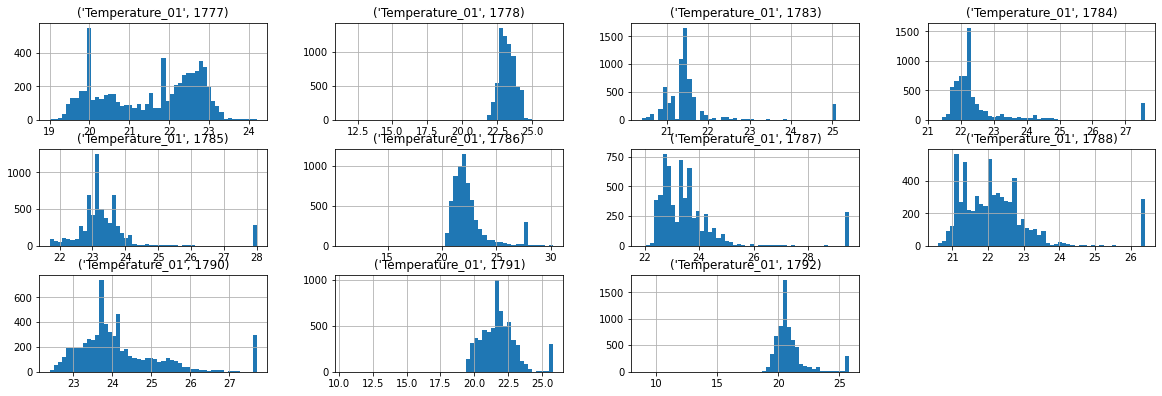

In [11]:
# HPlot histogram to check the distribution
df_full.hist(df_full.columns, bins = 50, layout = (8,4), figsize=(20, 18))
plt.show()

In [12]:
# Check the descriptive statistics
df_full.describe().T

,count,mean,std,min,25%,50%,75%,max
"('Temperature_01', 1777)",6474.0,21.512784,1.192705,19.00,20.3,21.9,22.6,24.2
"('Temperature_01', 1778)",6474.0,23.236369,0.602074,11.65,22.8,23.2,23.6,26.5
"('Temperature_01', 1783)",6474.0,21.578221,0.887302,20.40,21.2,21.4,21.6,25.4
"('Temperature_01', 1784)",6474.0,22.580275,1.272803,21.30,22.0,22.2,22.5,27.6
"('Temperature_01', 1785)",6474.0,23.448733,1.142097,21.70,22.9,23.2,23.6,28.0
"('Temperature_01', 1786)",6474.0,22.453676,1.682019,11.15,21.5,22.0,22.8,30.2
"('Temperature_01', 1787)",6474.0,23.674477,1.473928,21.90,22.8,23.4,23.8,29.5
"('Temperature_01', 1788)",6474.0,22.254912,1.159677,20.60,21.5,22.1,22.6,26.4
"('Temperature_01', 1790)",6474.0,24.183148,1.121480,22.40,23.5,23.9,24.6,27.7
"('Temperature_01', 1791)",6474.0,21.821774,1.366408,10.50,20.9,21.7,22.5,25.8


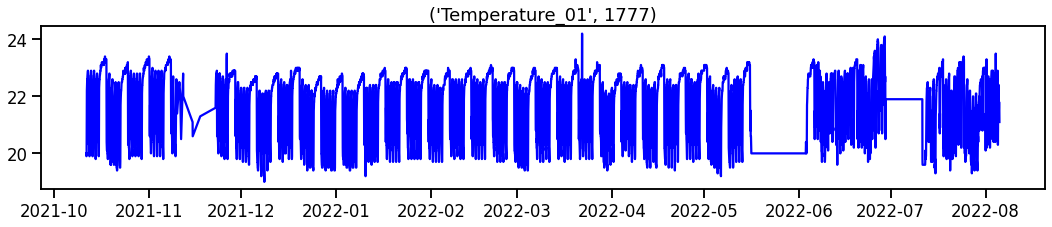

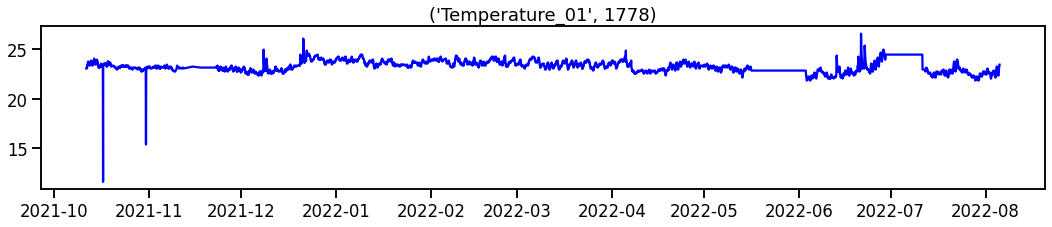

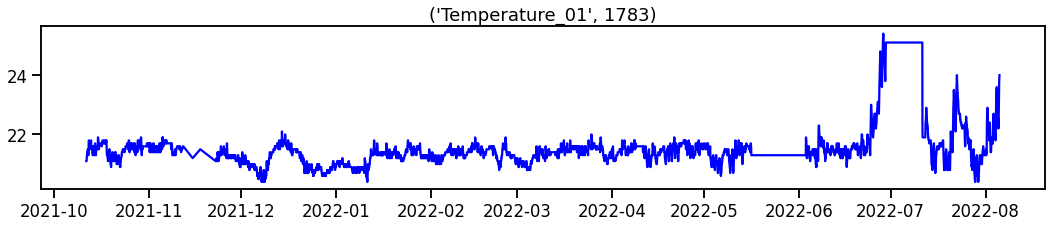

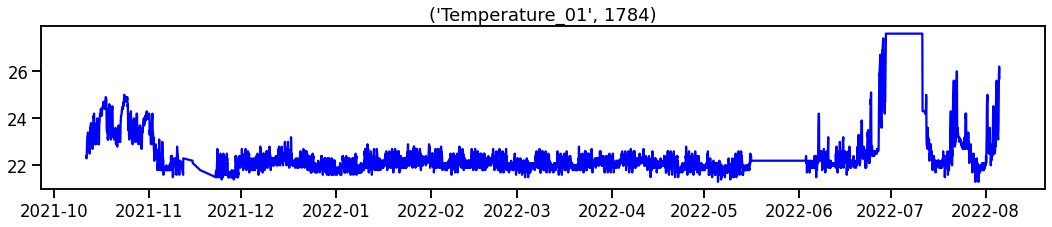

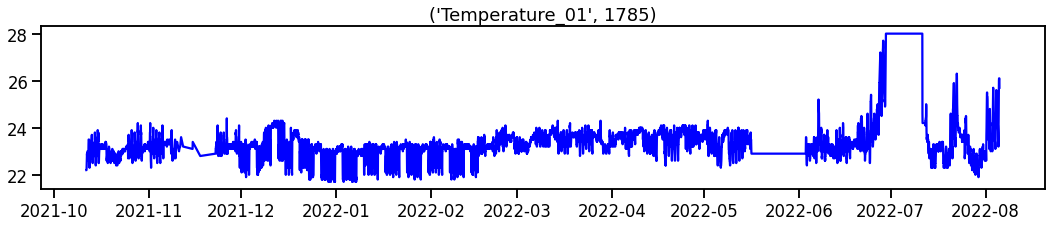

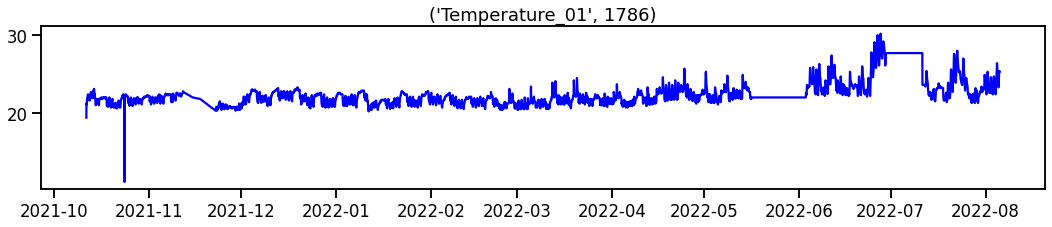

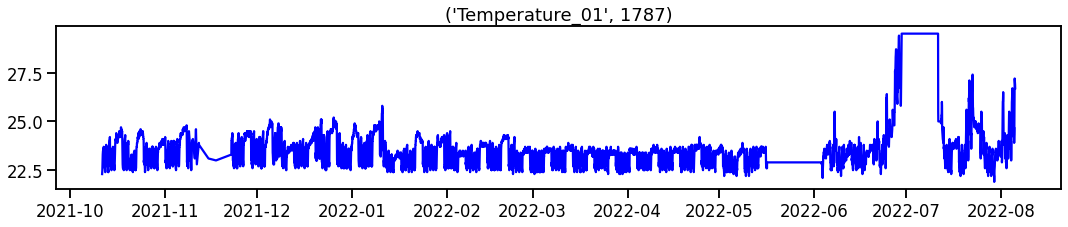

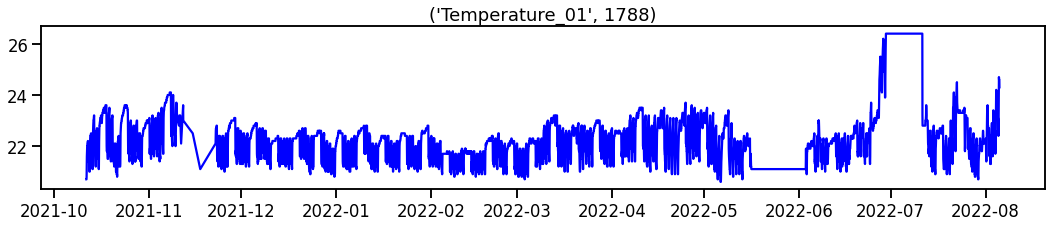

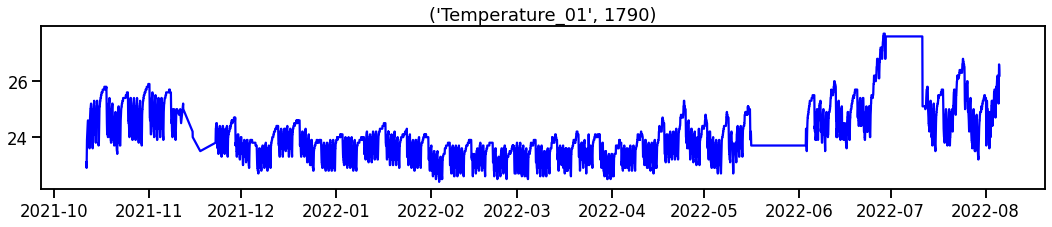

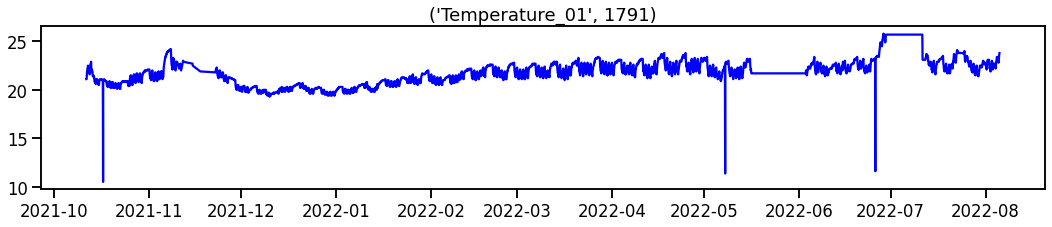

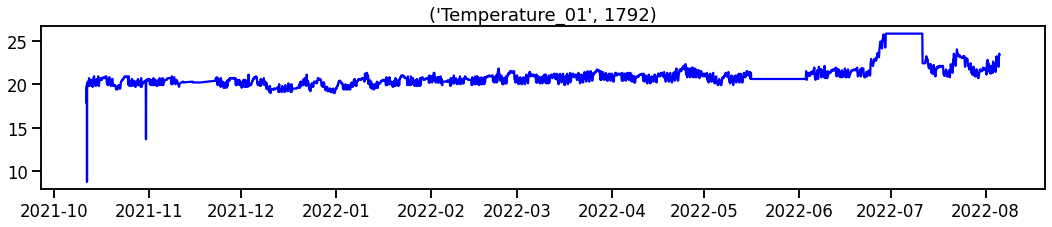

In [13]:
# Vizualize time series in the graph for each device
# Extract the headers of the numerical columns
headers = df_full.columns
# Plot time series for each device
for i in headers:
    sns.set_context('talk')
    _ = plt.figure(figsize = (18, 3))
    _ = plt.plot(df_full[i], color = 'blue')
    _ = plt.title(i)
    plt.show()

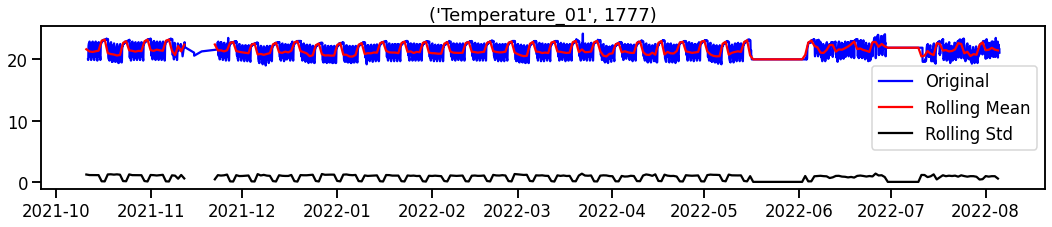

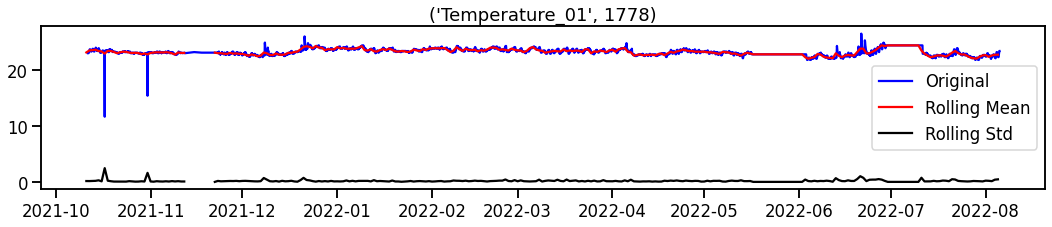

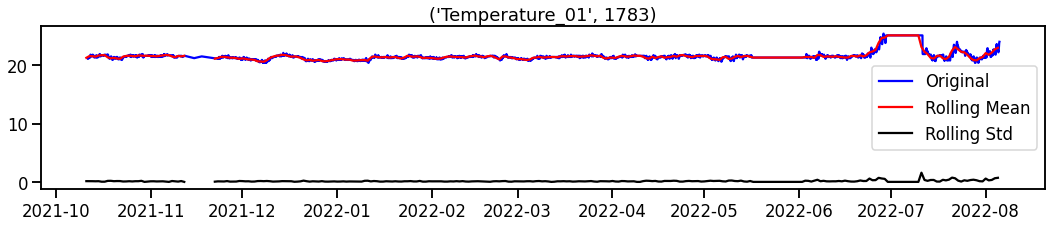

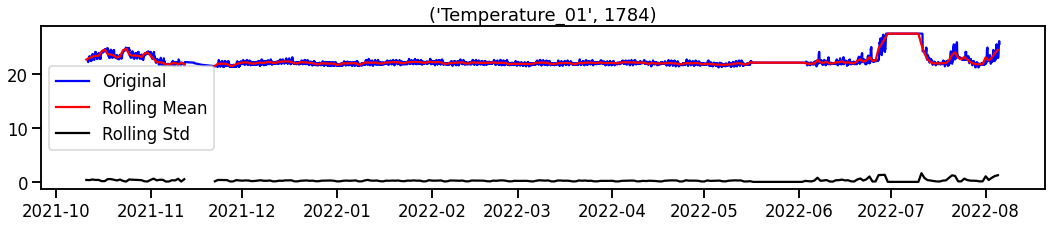

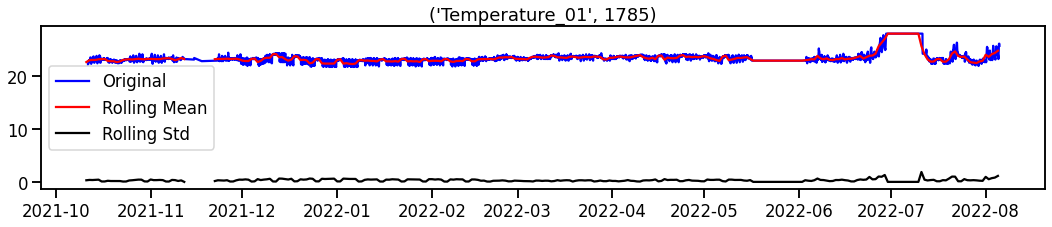

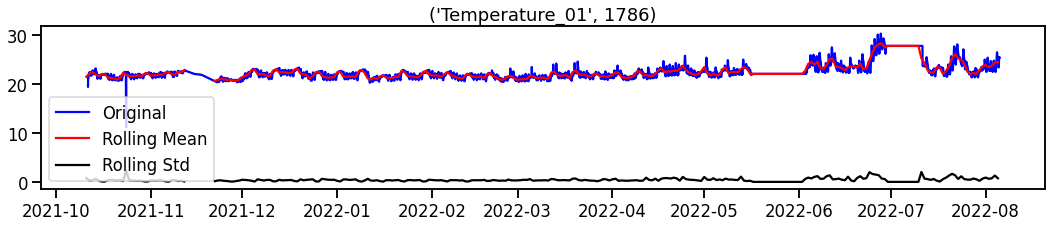

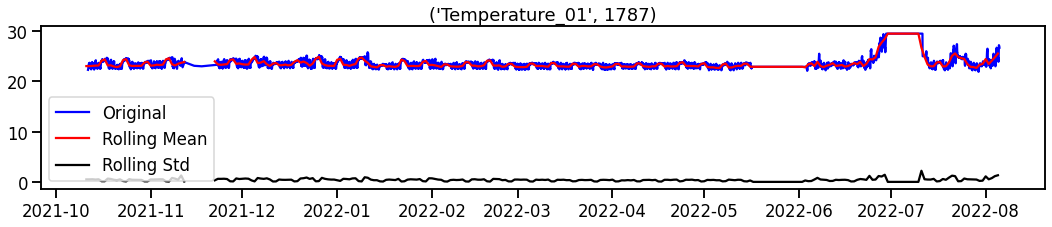

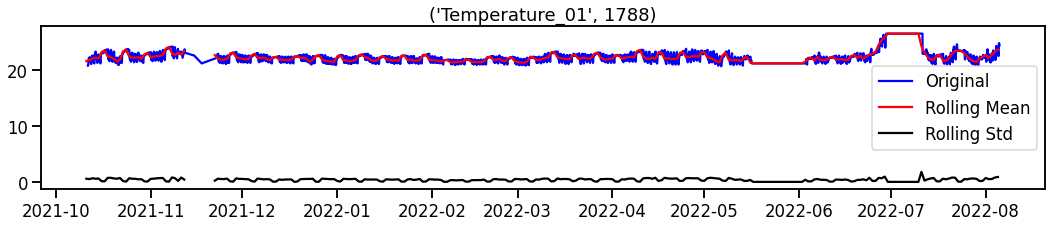

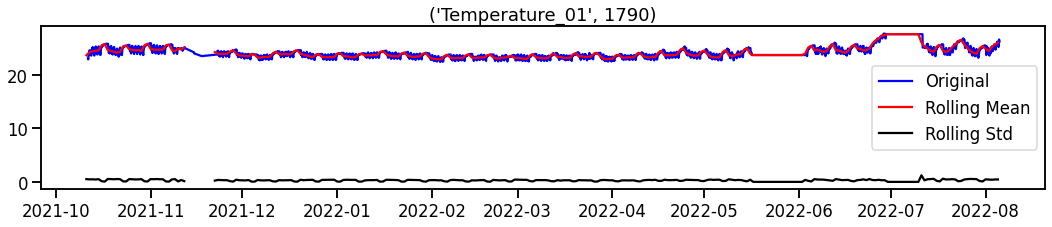

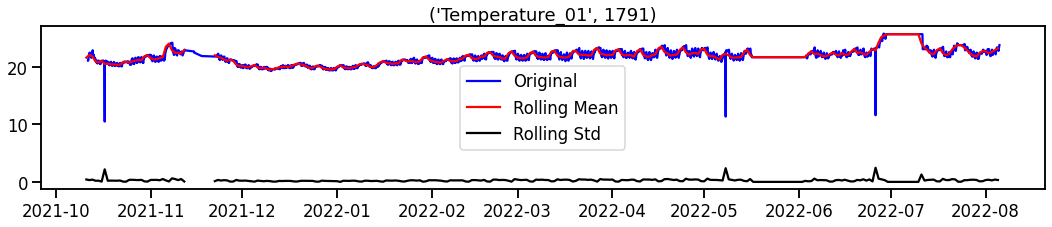

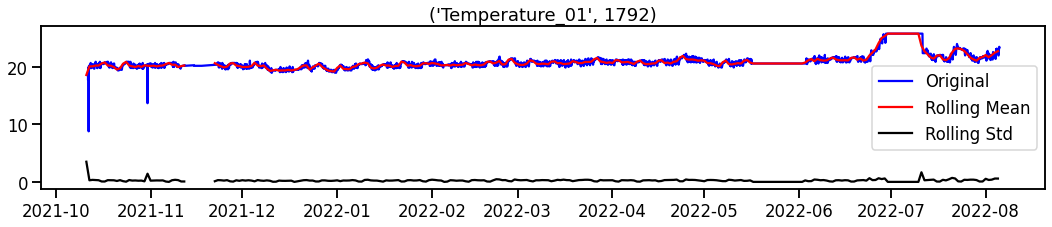

In [14]:
# Resample the entire dataset by daily average
rolling_mean = df_full.resample(rule = 'D').mean()
rolling_std = df_full.resample(rule = 'D').std()
# Plot time series for each device id
for i in headers:
    _ = plt.figure(figsize = (18, 3))
    _ = plt.plot(df_full[i], color = 'blue', label = 'Original')
    _ = plt.plot(rolling_mean[i], color = 'red', label = 'Rolling Mean')
    _ = plt.plot(rolling_std[i], color = 'black', label = 'Rolling Std' )
    _ = plt.legend(loc = 'best')
    _ = plt.title(i)
    plt.show()

In [15]:
# Standardize/scale the dataset and apply PCA
# Extract the names of the numerical columns
x = df_full[headers]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)


Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [16]:
# Calculate PCA with 2 components
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [17]:
# Explained variance
pca.explained_variance_ratio_

array([0.74564049, 0.09290278])

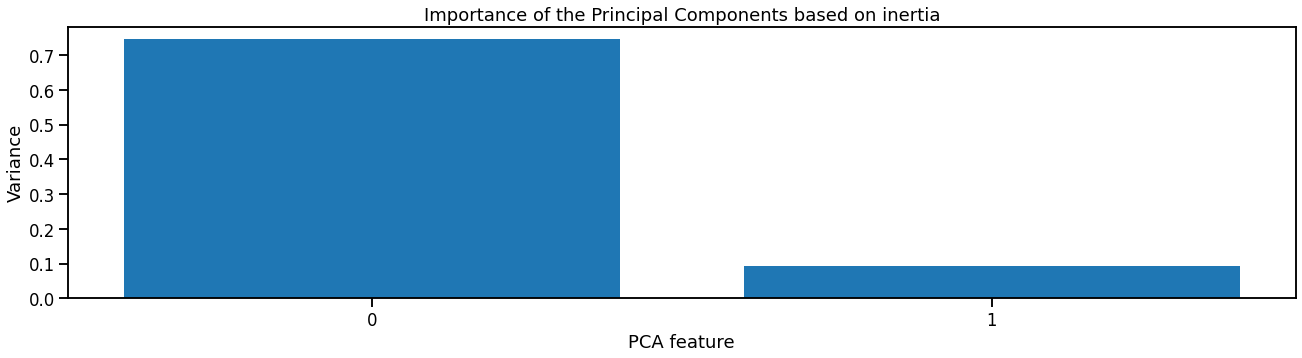

In [18]:
# Plot the importance of the Principal Components
features = range(pca.n_components_)
_ = plt.figure(figsize = (22, 5))
_ = plt.bar(features, pca.explained_variance_ratio_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [19]:
# Reconstruct from the 2 dimensional scores
reconstruct = pca.inverse_transform(principalComponents)
# The residual is the amount not explained
residual = df_full - reconstruct

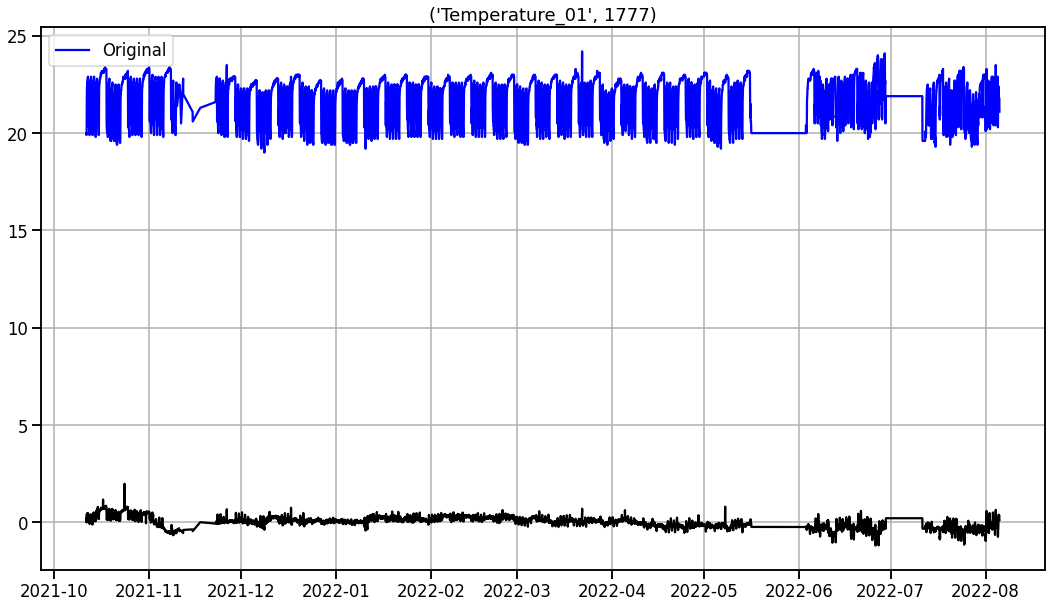

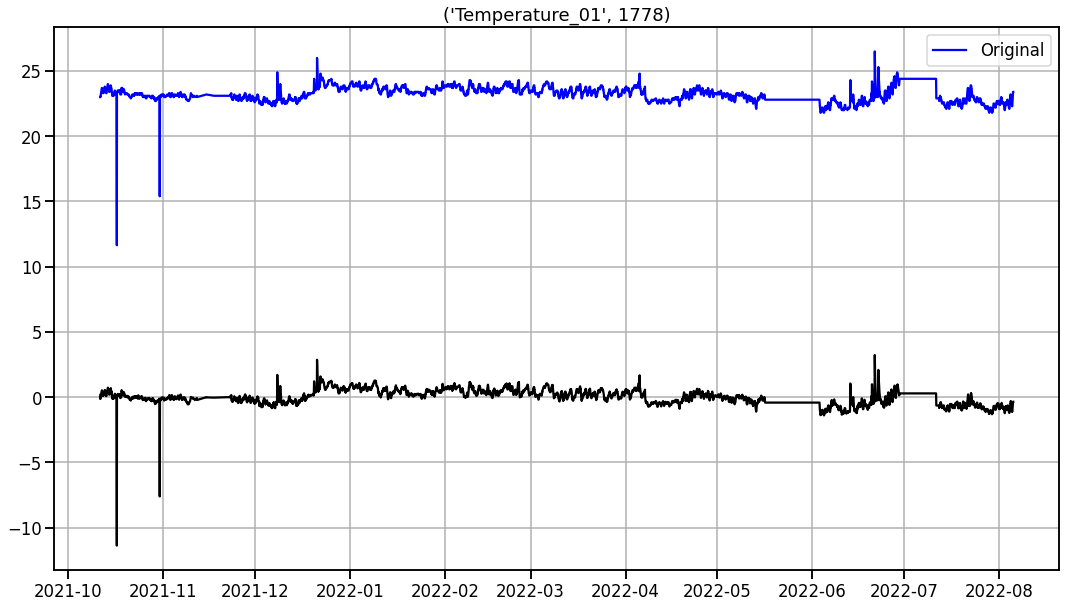

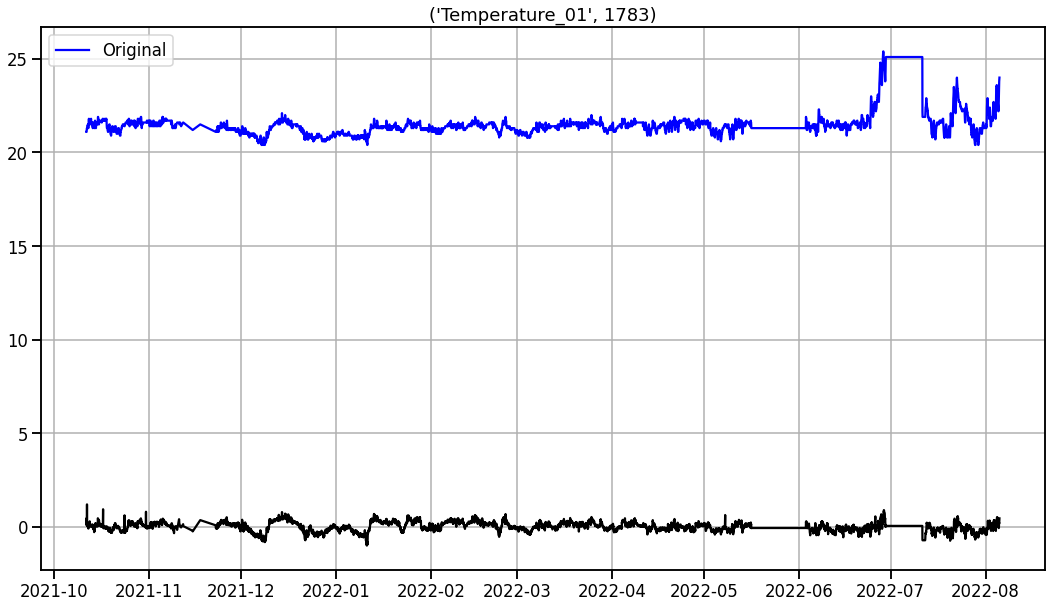

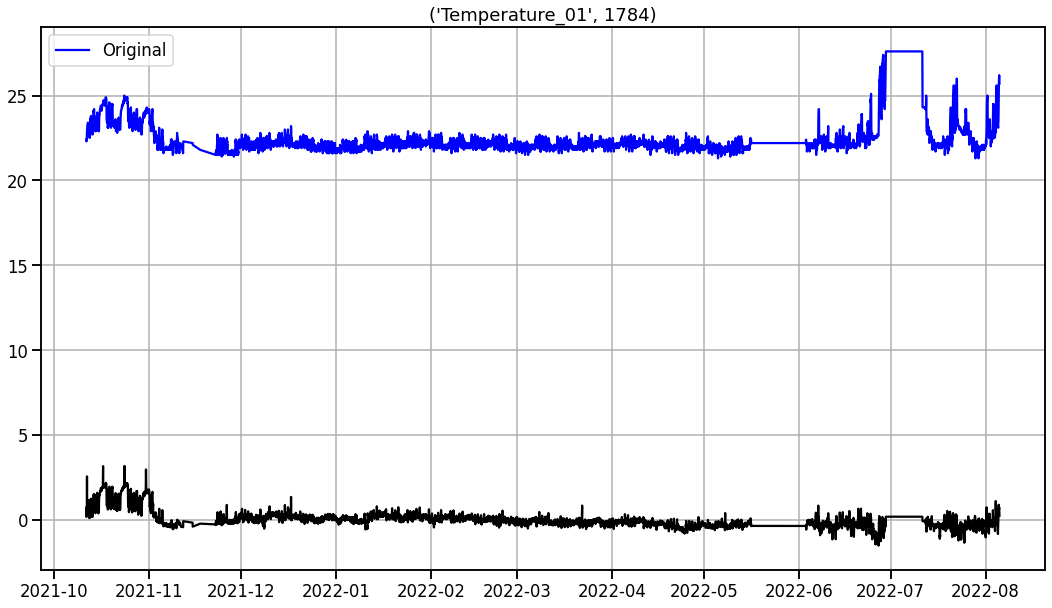

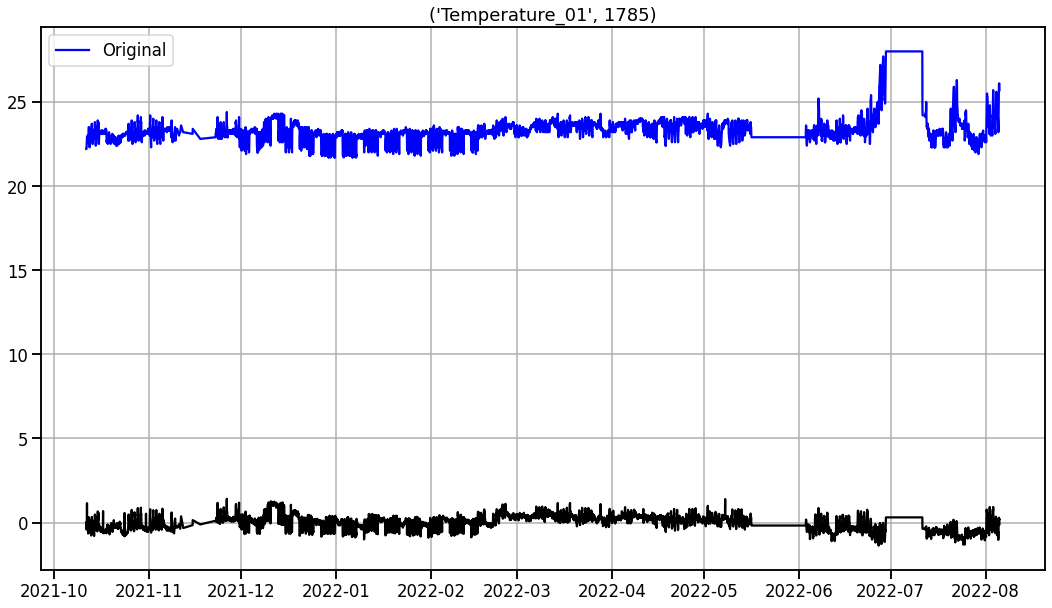

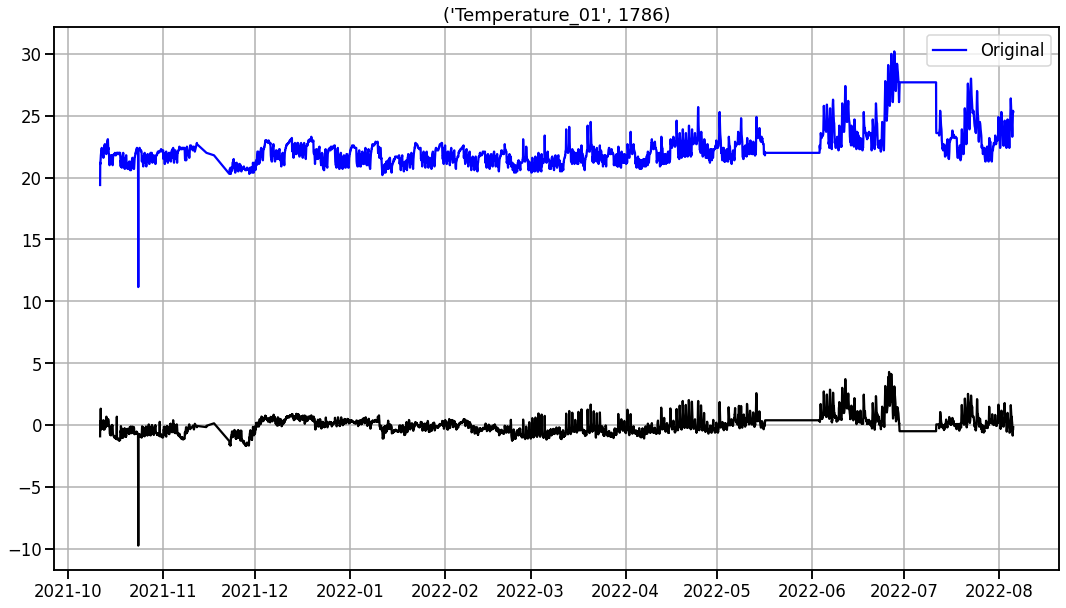

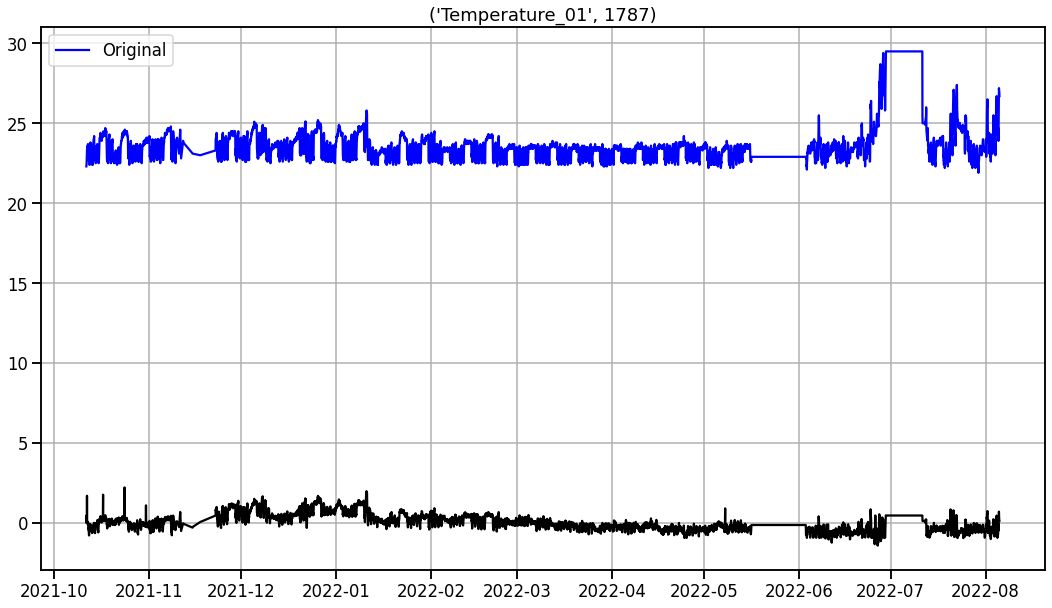

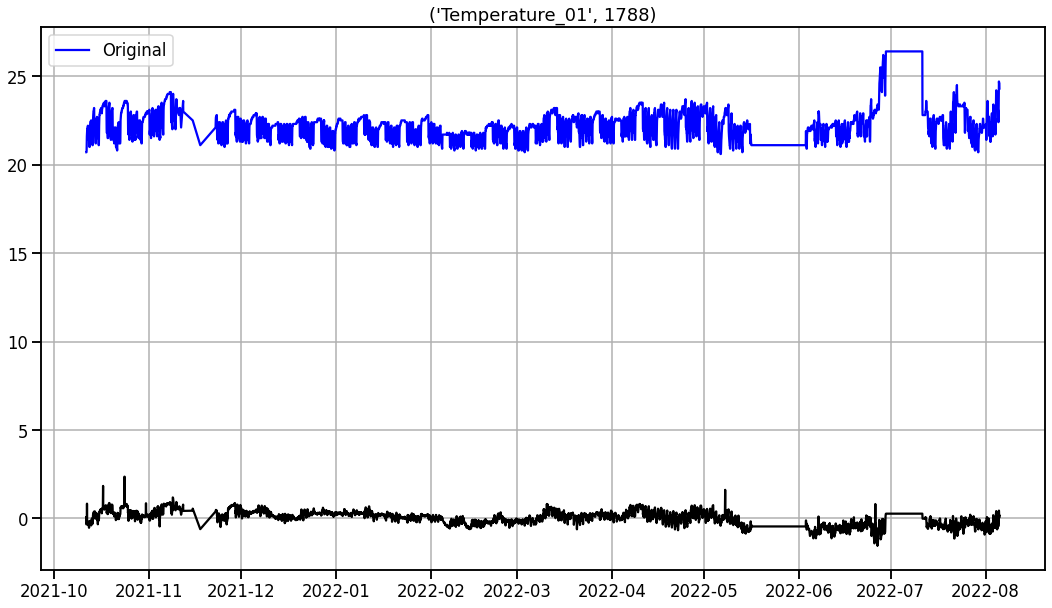

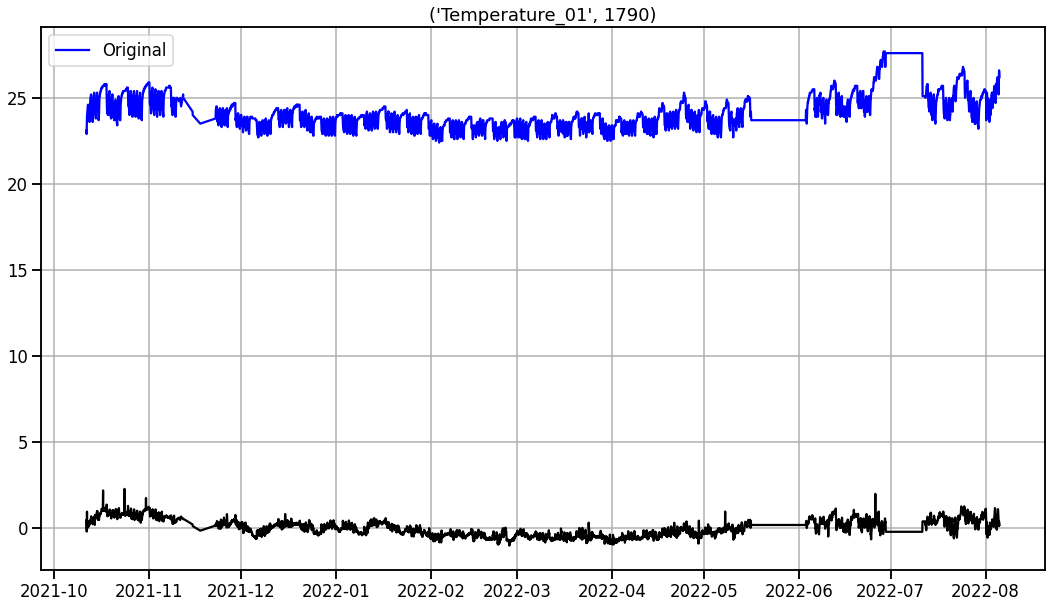

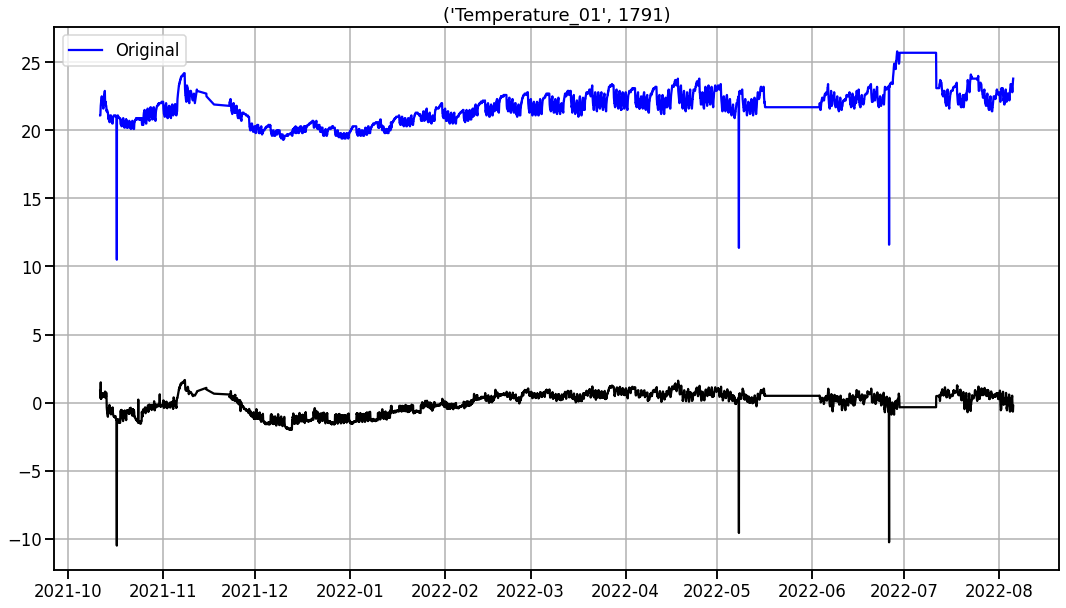

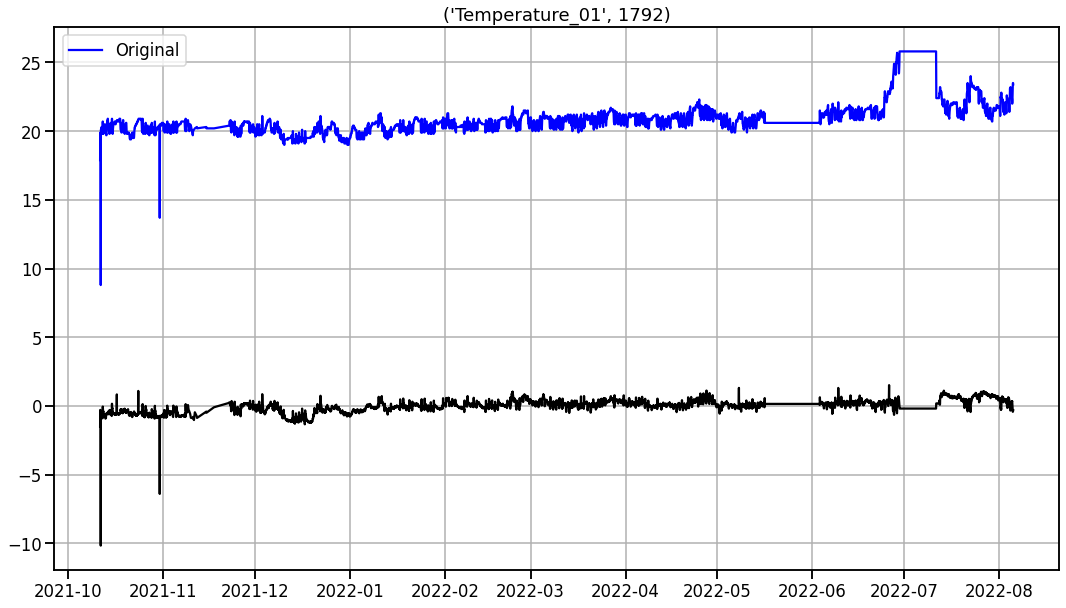

In [20]:
# Plot time series for each device with residuals
for i in headers:
    _ = plt.figure(figsize = (18, 10))
    _ = plt.plot(df_full[i], color = 'blue', label = 'Original')
    _ = plt.plot(residual[i], color = 'black')
    _ = plt.legend(loc = 'best')
    _ = plt.title(i)
    plt.grid()
    plt.show()

In [21]:
# Store the PC's in the original data
df_full['pc1'] = pd.Series(principalDf['pc1'].values, index = df_full.index)
df_full['pc2'] = pd.Series(principalDf['pc2'].values, index = df_full.index)
df_full.head()

,"('Temperature_01', 1777)","('Temperature_01', 1778)","('Temperature_01', 1783)","('Temperature_01', 1784)","('Temperature_01', 1785)","('Temperature_01', 1786)","('Temperature_01', 1787)","('Temperature_01', 1788)","('Temperature_01', 1790)","('Temperature_01', 1791)","('Temperature_01', 1792)",pc1,pc2
date,,,,,,,,,,,,,
2021-10-11 13:00:00+00:00,20.0,23.0,21.1,22.4,22.2,19.4,22.3,20.7,23.1,21.1,17.9,-4.710345,-1.309175
2021-10-11 14:00:00+00:00,19.9,23.0,21.1,22.3,22.2,21.2,22.4,20.7,23.1,21.1,19.6,-3.324675,-1.383599
2021-10-11 15:00:00+00:00,20.0,23.0,21.1,22.4,22.3,21.1,22.5,20.8,22.9,21.1,19.6,-3.282845,-1.371521
2021-10-11 16:00:00+00:00,21.6,23.0,21.2,22.4,22.5,21.3,22.8,21.3,23.3,21.4,19.7,-2.395546,0.105319
2021-10-11 17:00:00+00:00,22.2,23.1,21.3,22.8,22.7,21.5,23.1,21.6,23.7,21.7,19.9,-1.532957,0.516628


In [22]:
# To detecting the outliers in a data set we have follows quartile rule as follows:
# 1 Calculate the 1st and 3rd quartiles
# 2 Calculates the interquartile range
# 3 Calculate the upper and lower bound of our data range
# 4 Using the upper and lower bounds to identify the outlying data points

# Calculate outlier bounds using pc1
first_quartile_pc1, third_quartile_pc1 = df_full['pc1'].quantile([0.25, 0.75])
inter_quartile_range_pc1 = third_quartile_pc1 - first_quartile_pc1
lower_bound_pc1 = first_quartile_pc1 - (1.5*inter_quartile_range_pc1)
upper_bound_pc1 = third_quartile_pc1 + (1.5*inter_quartile_range_pc1)

In [23]:
# Find the anomaly using the PC1
df_full['anomaly_pc1'] = ((df_full['pc1'] > upper_bound_pc1) | (df_full['pc1'] < lower_bound_pc1)).astype('int')

In [24]:
# Find the anomaly using the PC1
anomaly_pc1 = df_full.loc[(df_full['pc1'] > upper_bound_pc1) | (df_full['pc1'] < lower_bound_pc1), 'pc1']

In [25]:
df_full['anomaly_pc1'].value_counts()

0    5980
1     494
Name: anomaly_pc1, dtype: int64

In [26]:
# Find anomaly for the respective residuals
residual['anomaly_pc1'] = ((df_full['pc1'] > upper_bound_pc1) | (df_full['pc1'] < lower_bound_pc1)).astype('int')

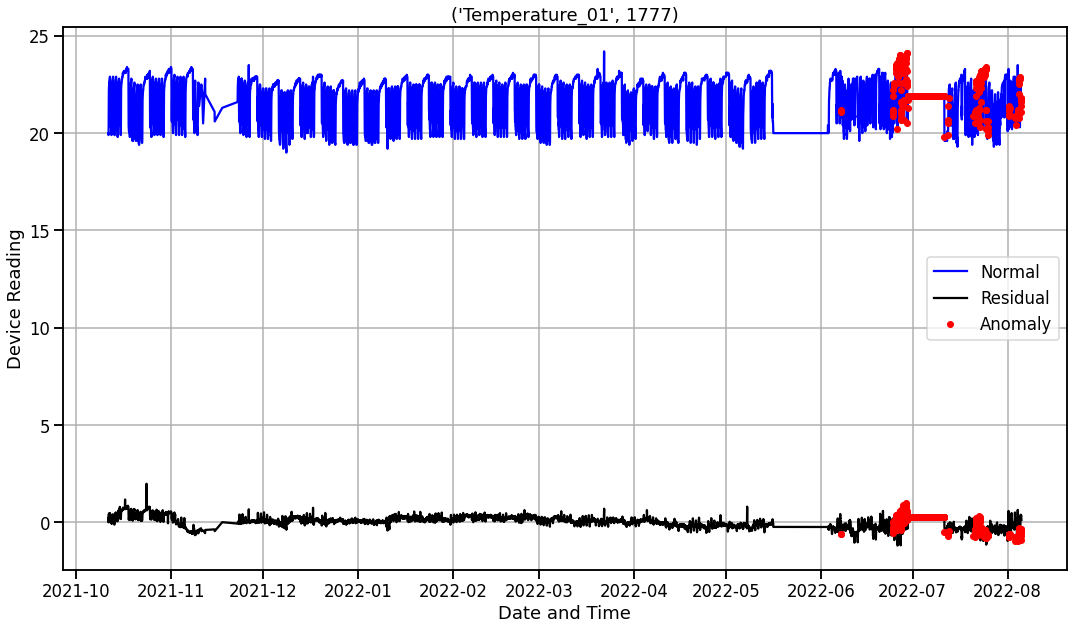

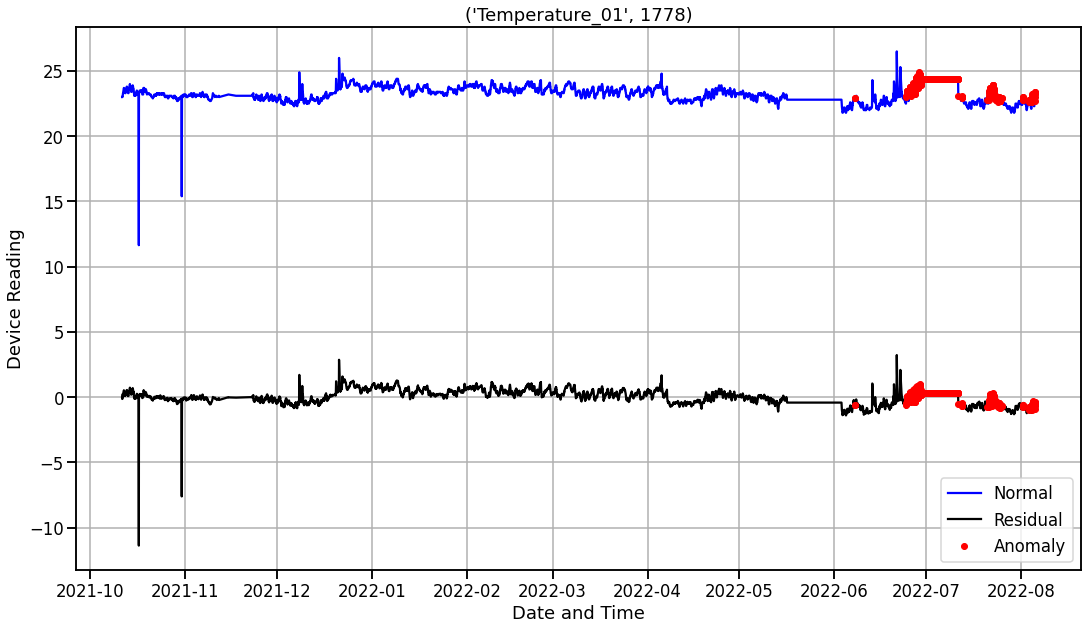

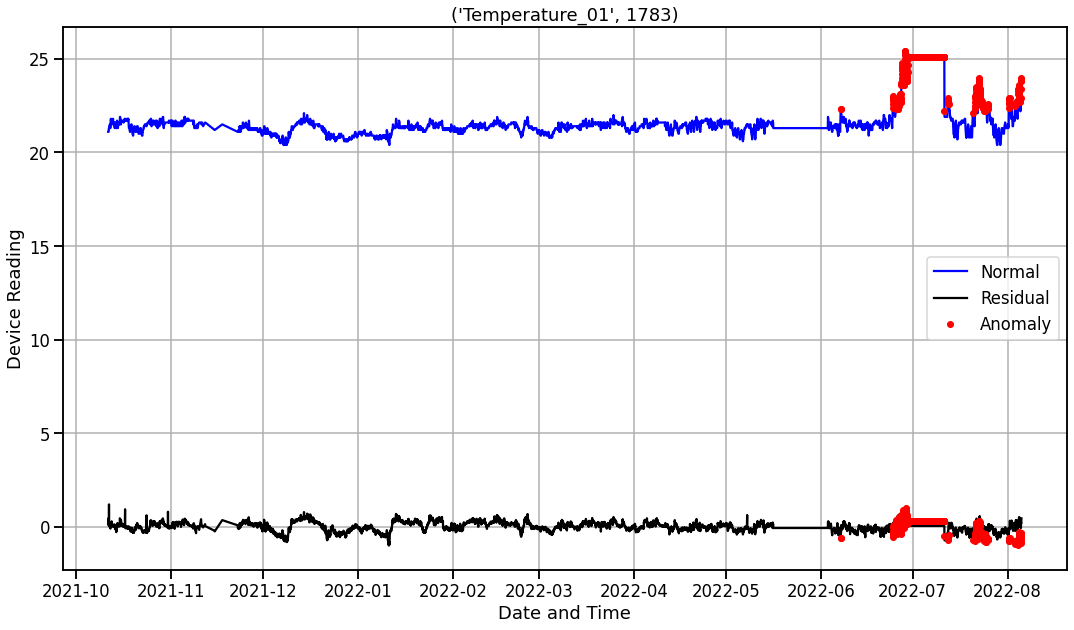

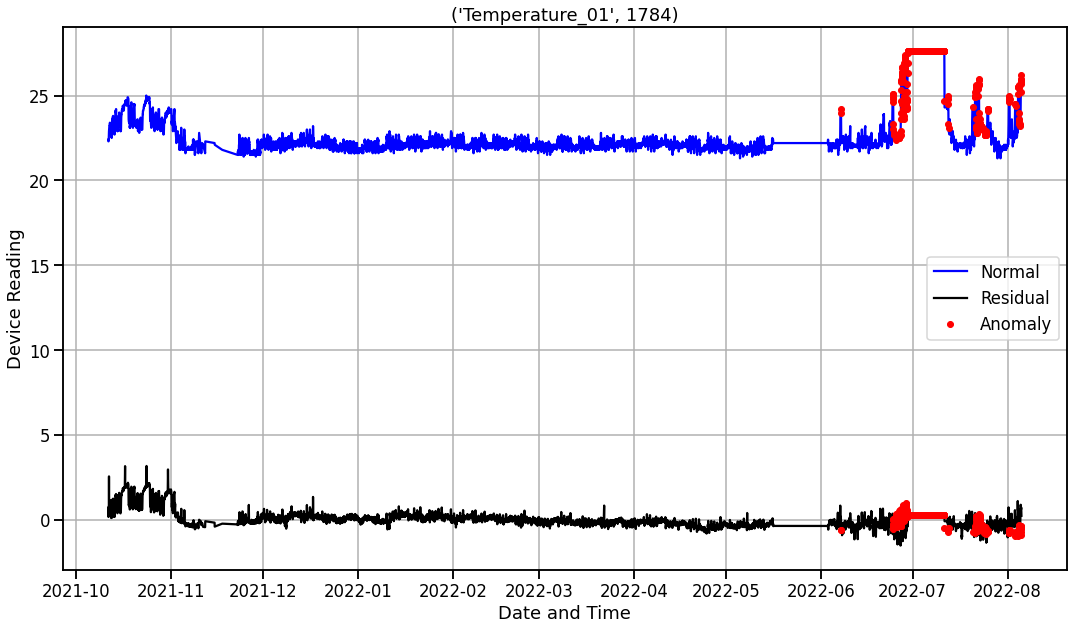

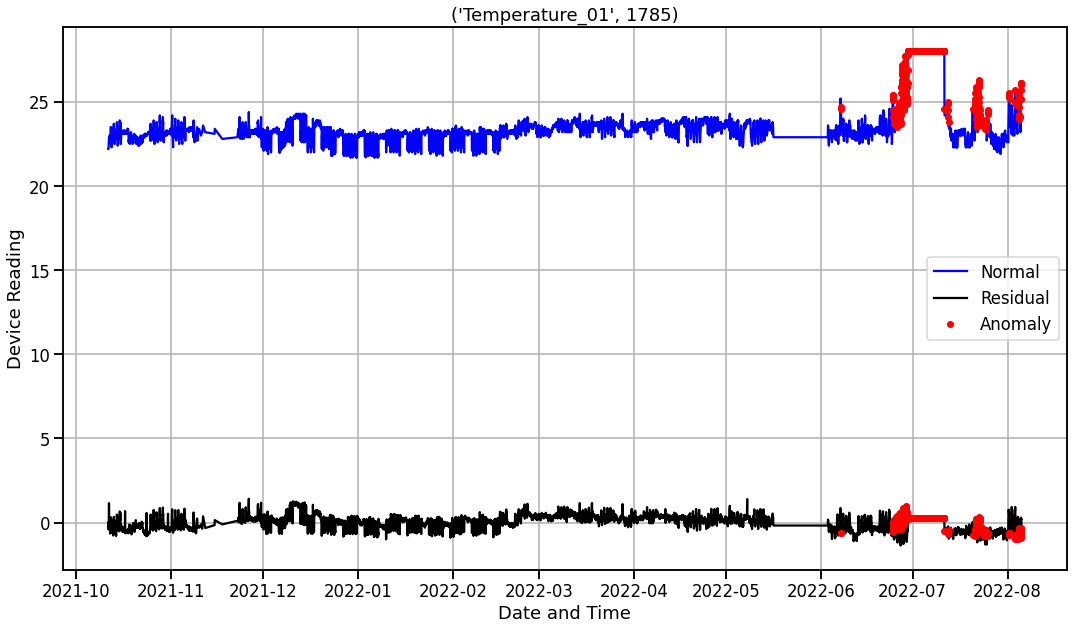

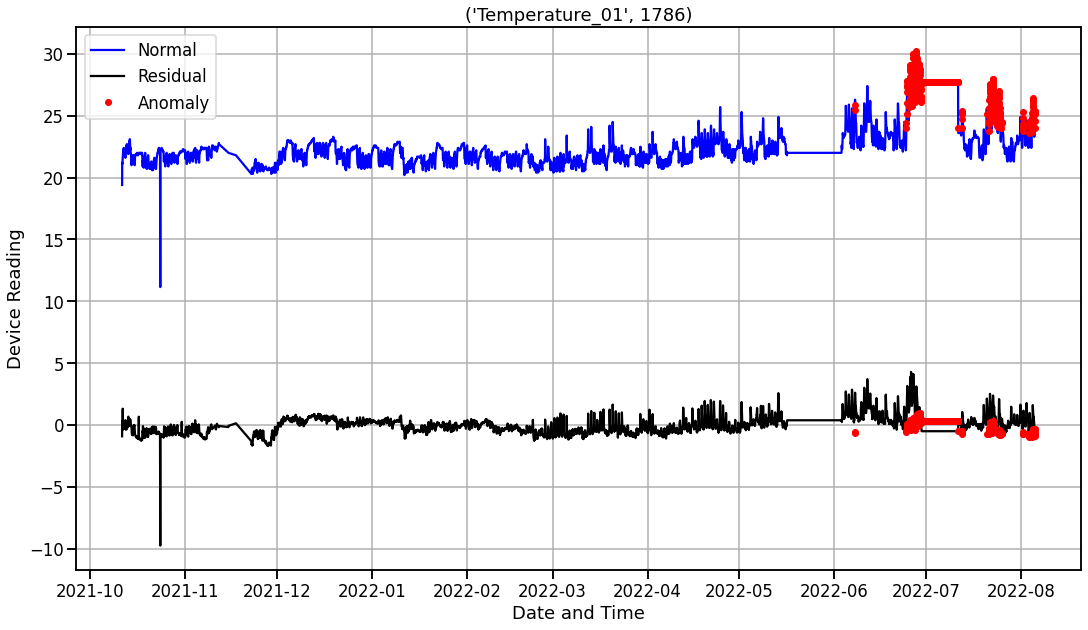

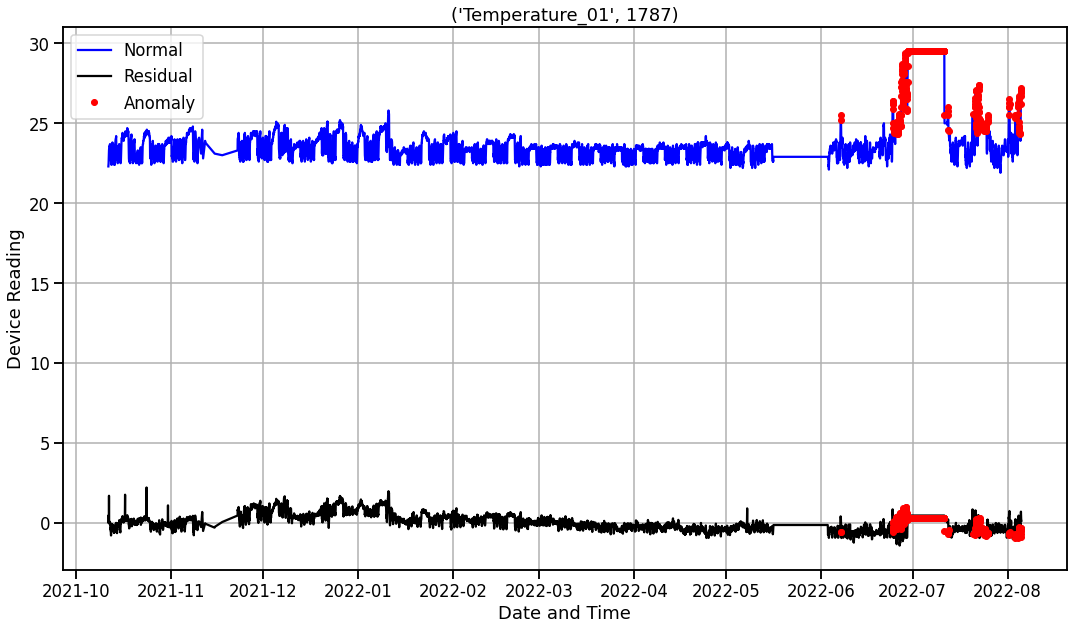

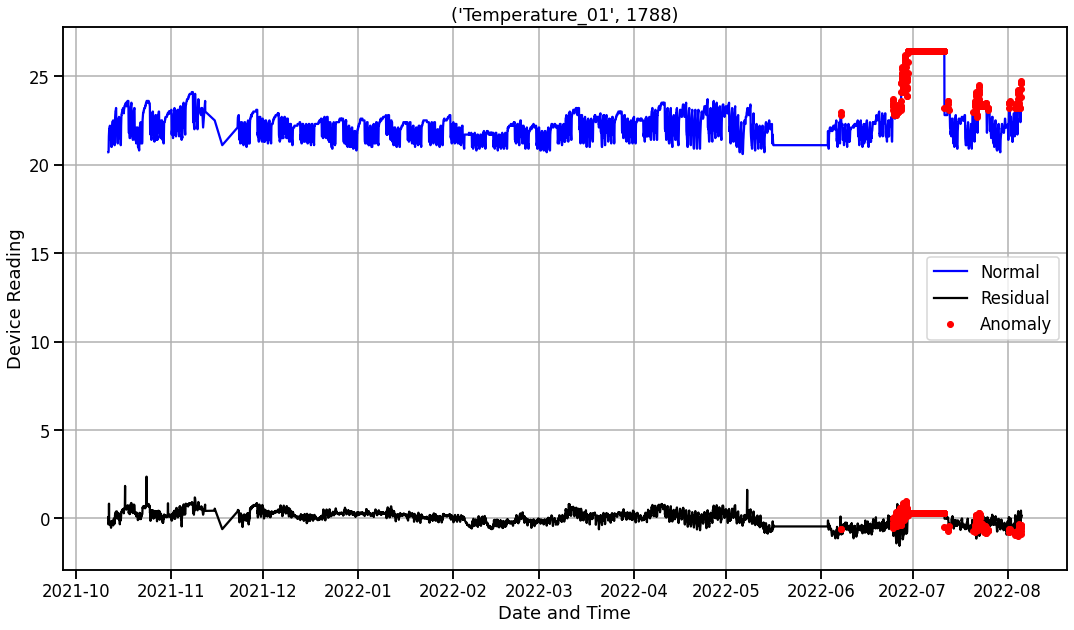

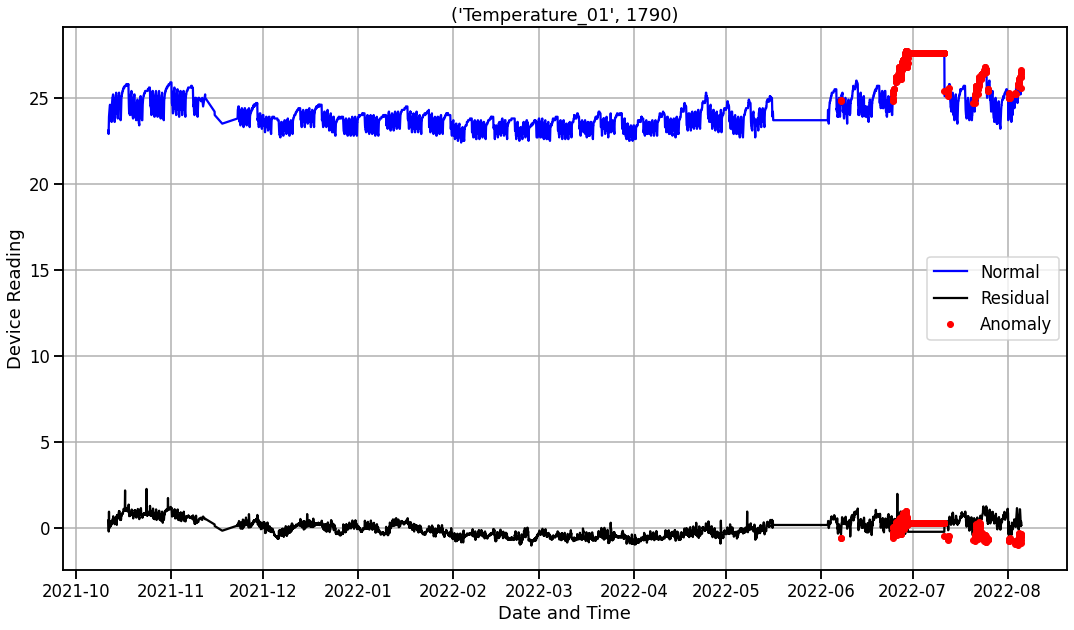

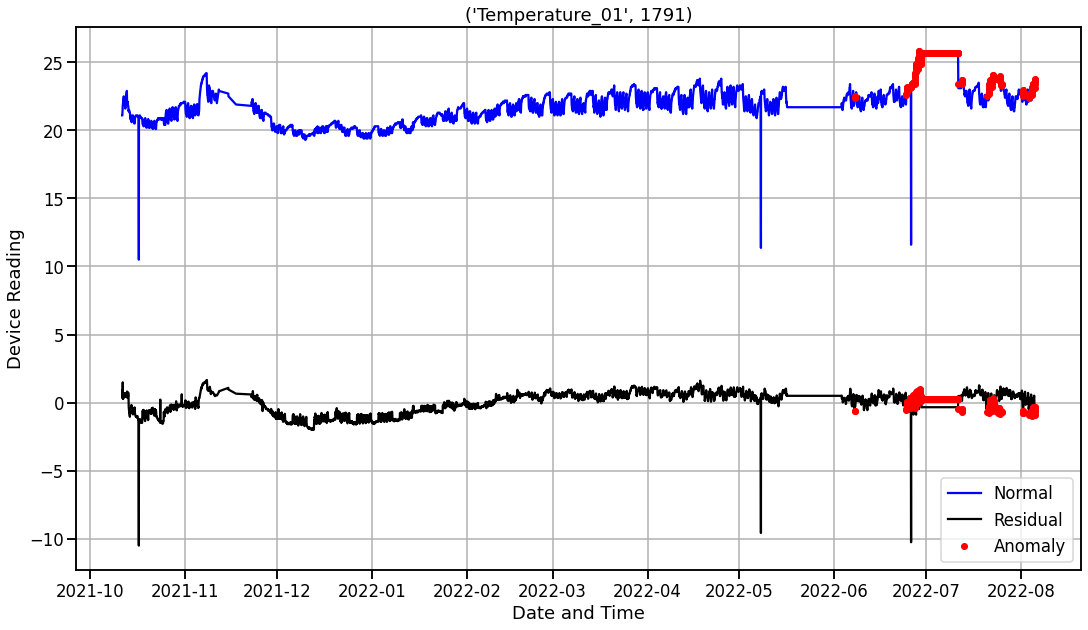

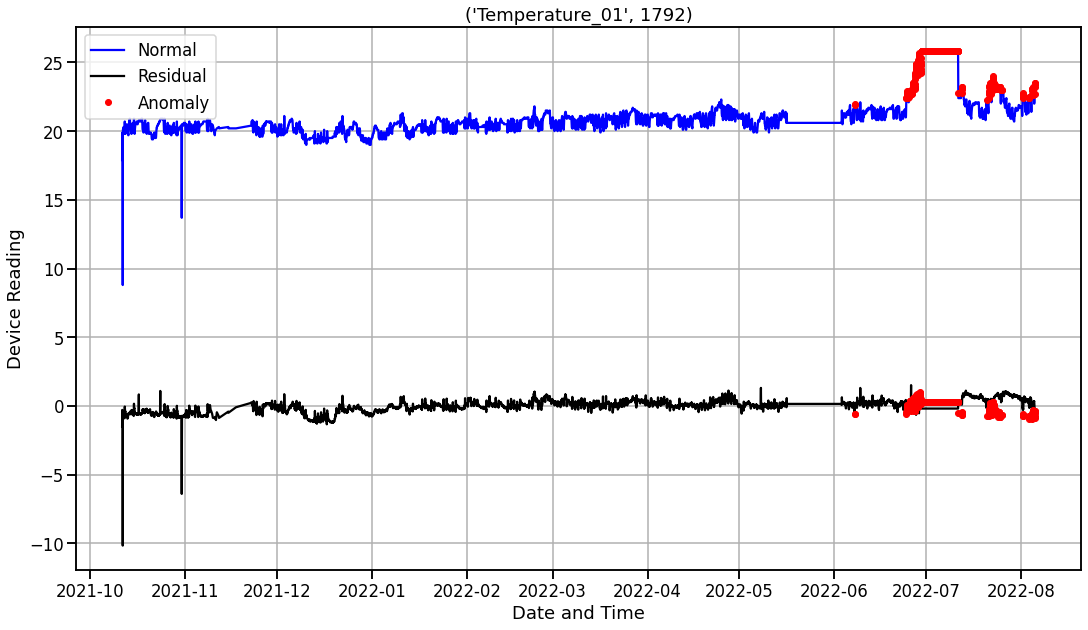

In [28]:
# Plot the anomaly from pc1 on top of the device_1778 see where they occured in the time series
for i in headers:
    a = df_full[df_full['anomaly_pc1'] == 1] #anomaly
    b = residual[residual['anomaly_pc1'] == 1] #anomaly
    _ = plt.figure(figsize = (18, 10))
    _ = plt.plot(df_full[i], color = 'blue', label = 'Normal')
    _ = plt.plot(residual[i], color = 'black', label = 'Residual')
    _ = plt.plot(a[i], linestyle = 'none', marker = '.', color = 'red', markersize = 12, label = 'Anomaly')
    _ = plt.plot(b['(\'Temperature_01\', 1778)'], linestyle = 'none', marker = '.', color = 'red', markersize = 12)
    _ = plt.xlabel('Date and Time')
    _ = plt.ylabel('Device Reading')
    _ = plt.title(i)
    _ = plt.legend(loc = 'best')
    plt.grid()
    plt.autoscale()
    plt.show();